## STOCK PRICE PREDICTION USING MACHINE LEARNING
#### Task 2 – Future Interns (FUTURE_ML_02)

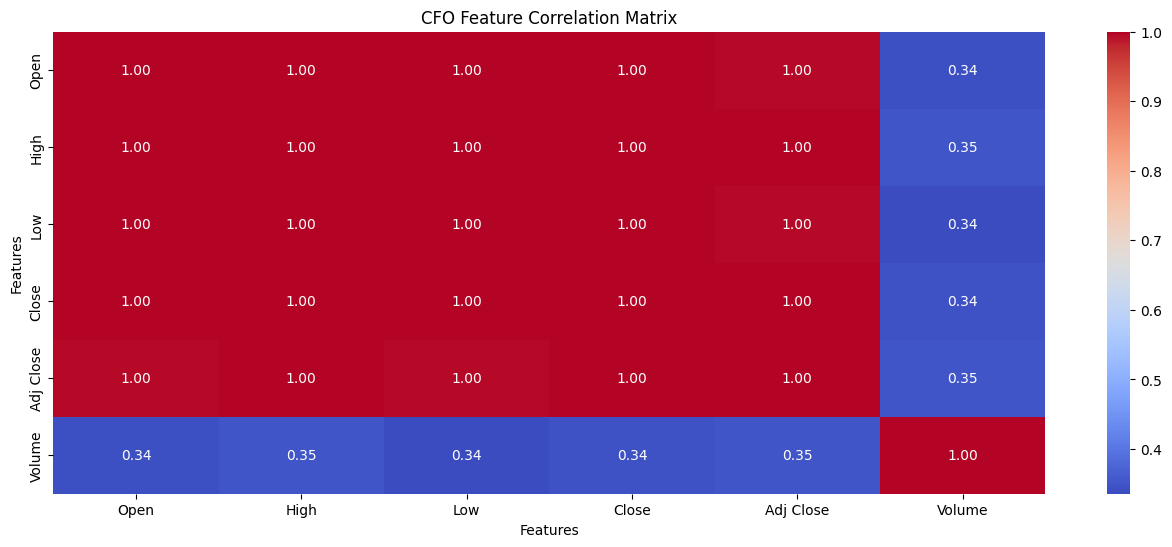

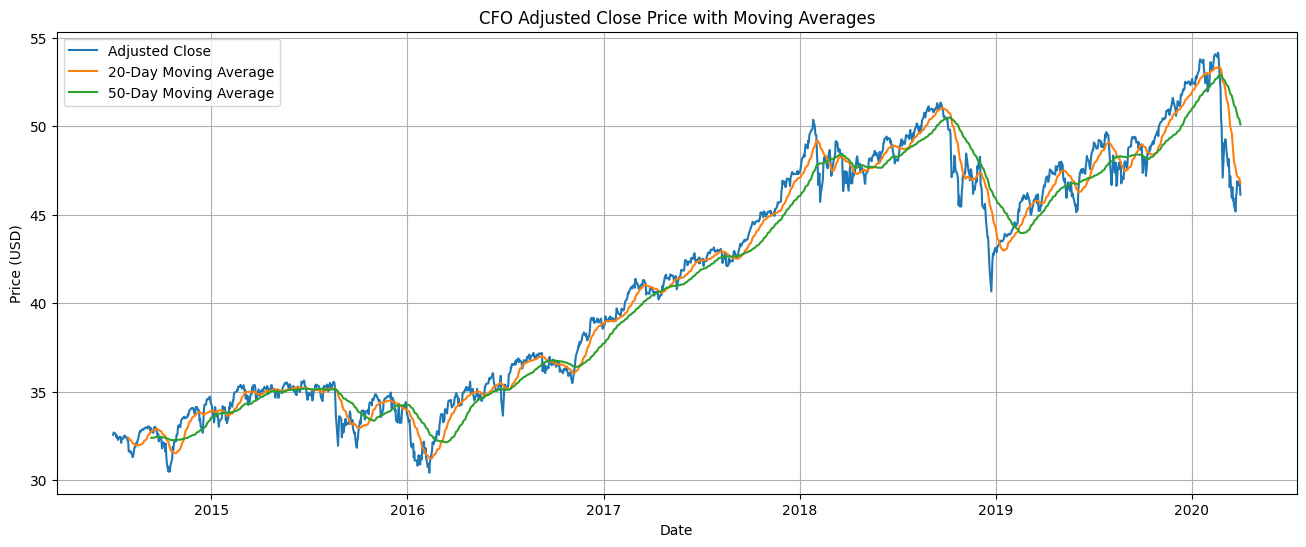

Epoch 1/20
35/35 [==============================] - 3s 33ms/step - loss: 0.0191 - val_loss: 0.0021
Epoch 2/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 3/20
35/35 [==============================] - 1s 19ms/step - loss: 9.1917e-04 - val_loss: 0.0020
Epoch 4/20
35/35 [==============================] - 1s 19ms/step - loss: 9.0246e-04 - val_loss: 0.0019
Epoch 5/20
35/35 [==============================] - 1s 19ms/step - loss: 8.8892e-04 - val_loss: 0.0019
Epoch 6/20
35/35 [==============================] - 1s 19ms/step - loss: 8.7971e-04 - val_loss: 0.0019
Epoch 7/20
35/35 [==============================] - 1s 19ms/step - loss: 8.6074e-04 - val_loss: 0.0017
Epoch 8/20
35/35 [==============================] - 1s 19ms/step - loss: 8.1008e-04 - val_loss: 0.0017
Epoch 9/20
35/35 [==============================] - 1s 19ms/step - loss: 7.9844e-04 - val_loss: 0.0015
Epoch 10/20
35/35 [==============================] - 1s 19ms/step - loss: 7.6179e

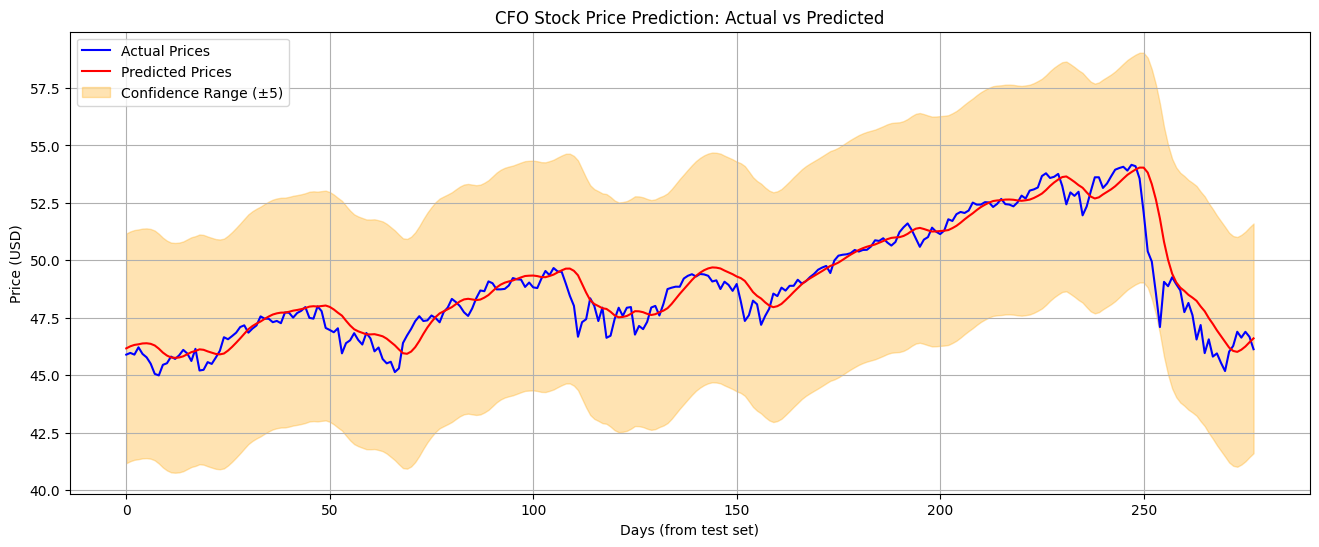

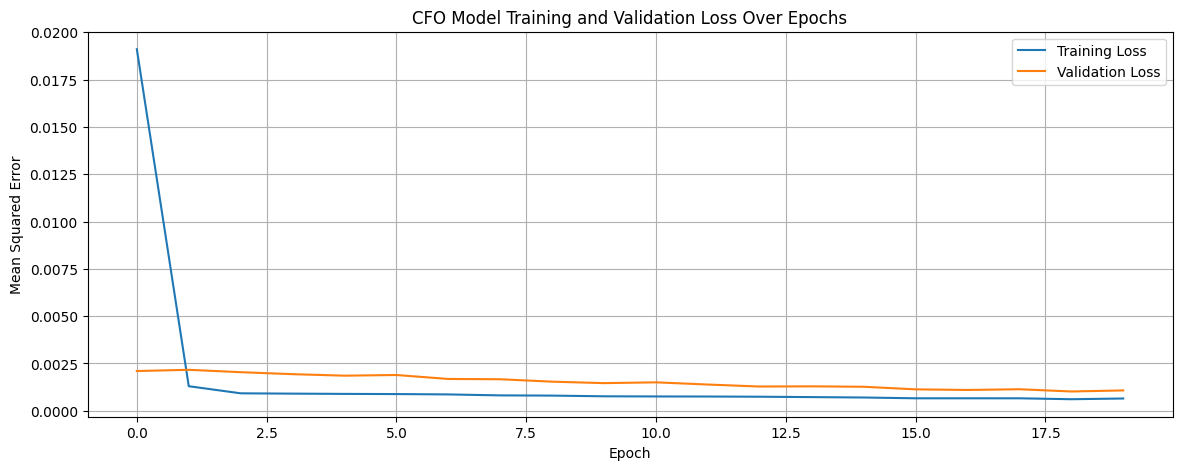

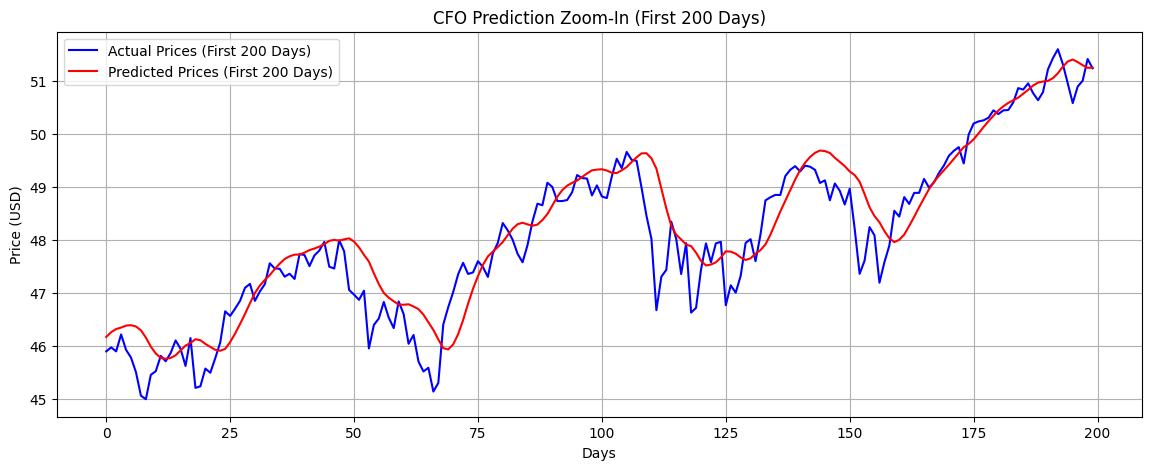

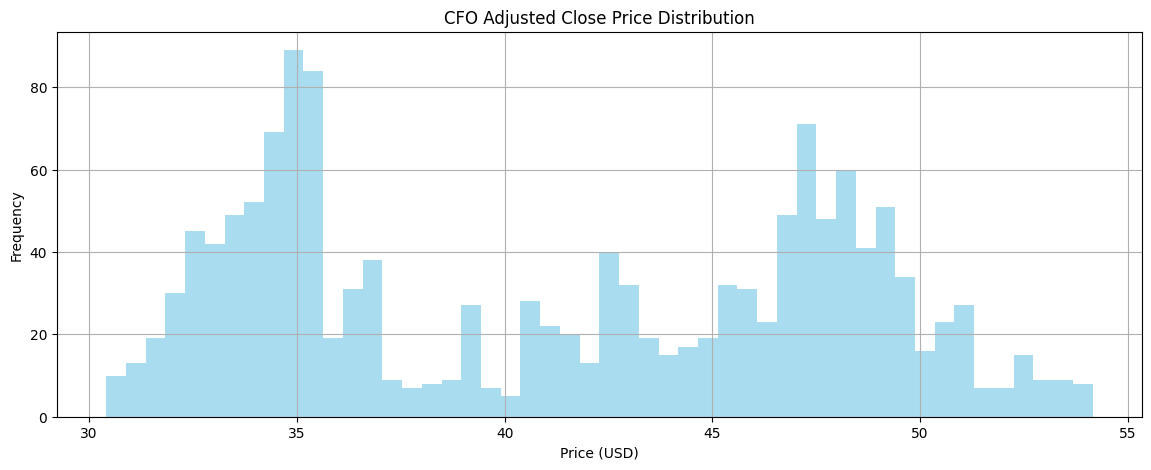

Mean Square Error: 0.6045
Root Mean Square Error: 0.7775
Mean Absolute Error: 0.5125


In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, LSTM  # type: ignore

# Step 2: Load Master Dataset
master_data = pd.read_csv(r'G:\Future_Intern\FUTURE_ML_02\etfs\CFO.csv')
symbol = 'CFO'  # Use the symbol that actually exists

# Step 3: Build and Validate Path
etf_path = os.path.join(r'G:\Future_Intern\FUTURE_ML_02\etfs', f'{symbol}.csv')
if not os.path.exists(etf_path):
    raise FileNotFoundError(f"File not found: {etf_path}")

# Step 4: Load Symbol Data
df = pd.read_csv(etf_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 5: Advanced EDA Visualization
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'{symbol} Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(16,6))
plt.plot(df['Adj Close'], label='Adjusted Close')
plt.plot(df['Adj Close'].rolling(window=20).mean(), label='20-Day Moving Average')
plt.plot(df['Adj Close'].rolling(window=50).mean(), label='50-Day Moving Average')
plt.legend()
plt.title(f'{symbol} Adjusted Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Step 6: Data Preprocessing
close_prices = df['Adj Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Step 7: Split Data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 8: LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 9: Predictions
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 10: Actual vs Predicted Plot
plt.figure(figsize=(16,6))
plt.plot(real_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.fill_between(range(len(real_prices)),
                 predicted_prices.flatten() - 5,
                 predicted_prices.flatten() + 5,
                 color='orange', alpha=0.3, label='Confidence Range (±5)')
plt.legend()
plt.title(f'{symbol} Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Days (from test set)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Step 11: Loss Curves
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title(f'{symbol} Model Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Step 12: Zoomed-in Plot
plt.figure(figsize=(14, 5))
plt.plot(real_prices[:200], label='Actual Prices (First 200 Days)', color='blue')
plt.plot(predicted_prices[:200], label='Predicted Prices (First 200 Days)', color='red')
plt.legend()
plt.title(f'{symbol} Prediction Zoom-In (First 200 Days)')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Step 13: Histogram
plt.figure(figsize=(14, 5))
plt.hist(close_prices, bins=50, color='skyblue', alpha=0.7)
plt.title(f'{symbol} Adjusted Close Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 14: Metrics
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
print(f'Mean Square Error: {mse:.4f}')
print(f'Root Mean Square Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')